In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
df = pd.read_csv('/content/social-media.csv')
df.describe()

,UserId,UsageDuraiton,Age,TotalLikes
count,63.000000,63.000000,63.000000,63.000000
mean,31.761905,4.000000,33.777778,5.317460
std,18.015866,2.879292,15.540213,6.135106
min,1.000000,1.000000,18.000000,0.000000
25%,16.500000,2.000000,19.000000,1.500000
50%,32.000000,3.000000,26.000000,4.000000
75%,47.500000,5.000000,50.000000,6.000000
max,62.000000,13.000000,60.000000,28.000000


In [16]:
df.head()

,UserId,UsageDuraiton,Age,Country,TotalLikes
0,1,2,55,Turkey,5
1,2,6,45,Canada,10
2,3,3,50,Ireland,7
3,4,4,35,South Africa,5
4,5,1,58,Turkey,2


In [26]:
df.isnull().sum()

,0
UserId,0
UsageDuraiton,0
Age,0
Country,0
TotalLikes,0


Considering **Age** as a feature, the target value is  **UsageDuraiton**.

In [35]:
X = df.drop(['UsageDuraiton','TotalLikes', 'UserId','Country'], axis=1)
y = df['UsageDuraiton']

In [36]:
# Train-test split 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
MAE = mean_absolute_error(y_test, model.predict(X_test))
MSE = mean_squared_error(y_test, model.predict(X_test))
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, model.predict(X_test))

print('MAE:', MAE)
print('MSE:', MSE)
print('RMSE:', RMSE)
print('R2:', R2)

MAE: 2.2886711555915933
MSE: 9.651014226625646
RMSE: 3.106608154664126
R2: 0.2908602590001157


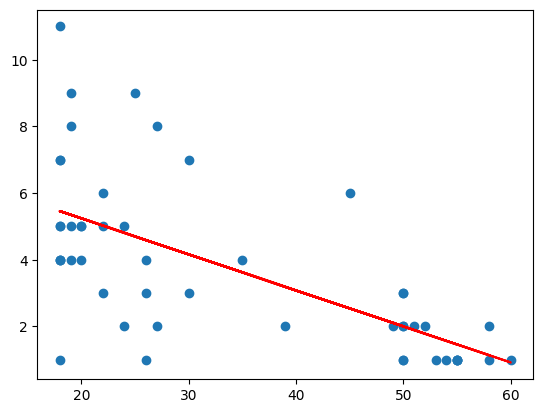

In [47]:
m, b = np.polyfit(X_train['Age'], y_train, 1)
plt.scatter(X_train['Age'], y_train)
plt.plot(X_train['Age'], m*X_train['Age'] + b, color='red')
plt.show()